**Md. Sohanur Rahman Sohan**

**ID:17-35357-3**

**CVPR (A) Project**

# **Initializing the process by importing the necessary tools**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

# **Loading data from mnist dataset**

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# **Checking to see if data was loaded**

Image (#20): Which is digit '4'


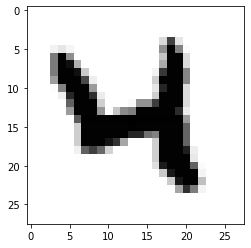

In [5]:
digit = 20 # Change to choose new digit
a = X_train[digit]
plt.imshow(a, cmap='binary')
print(f"Image (#{digit}): Which is digit '{Y_train[digit]}'")


# **Laying out the entire dataset**

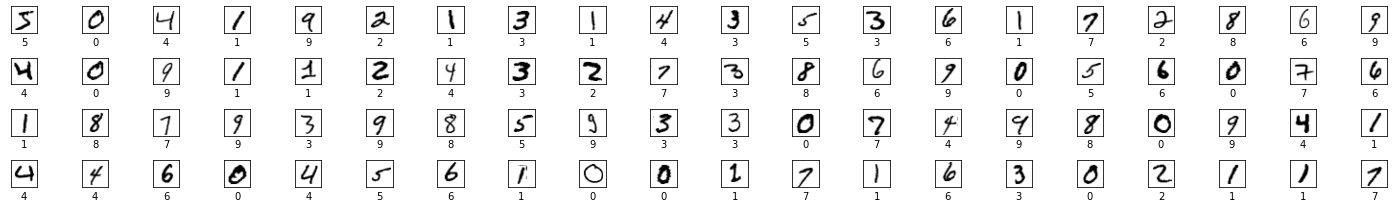

In [7]:
ROWS = 4
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train[i], cmap=plt.cm.binary)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train[i])
        i += 1
plt.tight_layout()
plt.show()

# **Normalizing the testing and training data**

In [8]:
X_train, X_test = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255, X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255

In [9]:
model = tf.keras.Sequential([
	tf.keras.Input(shape=(28, 28, 1)),
	tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
	tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
	tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
	tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(units=64, activation='relu'),
	tf.keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

# **Using Adam Optimizer**

In [10]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# **Training the data**

In [24]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 29s 22ms/step - loss: 2.6730e-04 - accuracy: 0.9999 - val_loss: 0.1147 - val_accuracy: 0.9911
Epoch 2/10
1313/1313 [==============================] - 29s 22ms/step - loss: 1.9668e-04 - accuracy: 0.9999 - val_loss: 0.1190 - val_accuracy: 0.9908
Epoch 3/10
1313/1313 [==============================] - 29s 22ms/step - loss: 1.7039e-04 - accuracy: 0.9999 - val_loss: 0.1357 - val_accuracy: 0.9900
Epoch 4/10
1313/1313 [==============================] - 28s 22ms/step - loss: 1.7733e-04 - accuracy: 0.9999 - val_loss: 0.1346 - val_accuracy: 0.9905
Epoch 5/10
1313/1313 [==============================] - 29s 22ms/step - loss: 1.3361e-04 - accuracy: 1.0000 - val_loss: 0.1370 - val_accuracy: 0.9899
Epoch 6/10
1313/1313 [==============================] - 28s 22ms/step - loss: 3.6076e-05 - accuracy: 1.0000 - val_loss: 0.1305 - val_accuracy: 0.9913
Epoch 7/10
1313/1313 [==============================] - 29s 22ms/step - loss: 7.1733e-07 - accuracy:

# **Accuracy testing**

In [26]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 [==============================] - 2s 7ms/step - loss: 0.0968 - accuracy: 0.9929

Test accuracy: 0.992900013923645


# **Plotting the training results**

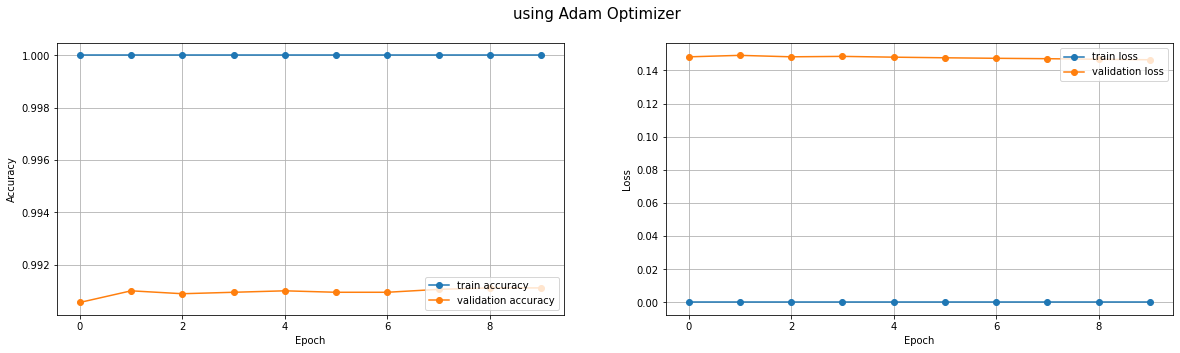

In [29]:
plt.figure(figsize=(20,5))
plt.suptitle('using Adam Optimizer', fontsize = 15)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# **using SDG Optimizer**

In [30]:
model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# **Training the data**

In [31]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1465 - val_accuracy: 0.9911
Epoch 2/10
1313/1313 [==============================] - 28s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1465 - val_accuracy: 0.9911
Epoch 3/10
1313/1313 [==============================] - 28s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1465 - val_accuracy: 0.9911
Epoch 4/10
1313/1313 [==============================] - 28s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1465 - val_accuracy: 0.9911
Epoch 5/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1465 - val_accuracy: 0.9911
Epoch 6/10
1313/1313 [==============================] - 28s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1465 - val_accuracy: 0.9911
Epoch 7/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0000e+00 - accuracy:

# **Accuracy testing**

In [32]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 [==============================] - 2s 6ms/step - loss: 0.0968 - accuracy: 0.9929

Test accuracy: 0.992900013923645


# **Plotting the training results**

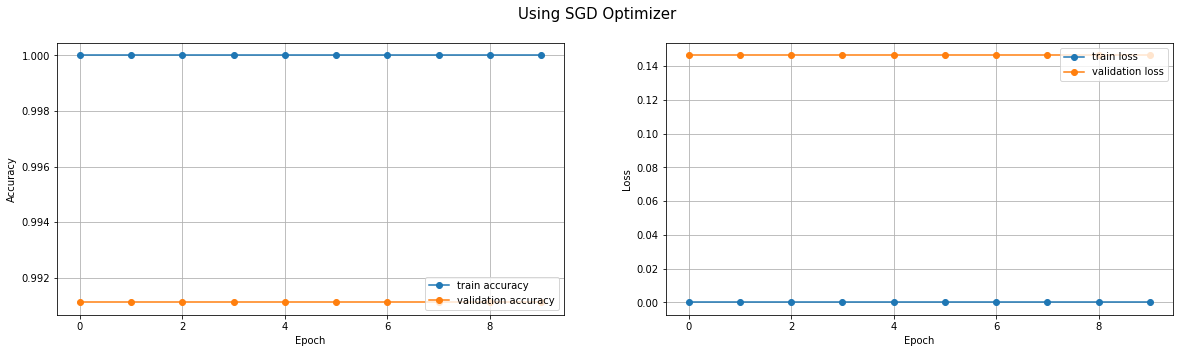

In [33]:
plt.figure(figsize=(20,5))
plt.suptitle('Using SGD Optimizer', fontsize = 15)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# **using RSMprop Optimizer**

In [34]:
model.compile(
    optimizer='RMSprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# **Training the data**

In [35]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 29s 22ms/step - loss: 8.5149e-12 - accuracy: 1.0000 - val_loss: 0.1463 - val_accuracy: 0.9911
Epoch 2/5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1460 - val_accuracy: 0.9911
Epoch 3/5
1313/1313 [==============================] - 29s 22ms/step - loss: 2.8383e-12 - accuracy: 1.0000 - val_loss: 0.1458 - val_accuracy: 0.9911
Epoch 4/5
1313/1313 [==============================] - 29s 22ms/step - loss: 2.8383e-12 - accuracy: 1.0000 - val_loss: 0.1456 - val_accuracy: 0.9911
Epoch 5/5
1313/1313 [==============================] - 29s 22ms/step - loss: 2.8383e-12 - accuracy: 1.0000 - val_loss: 0.1455 - val_accuracy: 0.9911


# **Accuracy testing**

In [36]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 [==============================] - 2s 6ms/step - loss: 0.0964 - accuracy: 0.9930

Test accuracy: 0.9929999709129333


# **Plotting the training results**

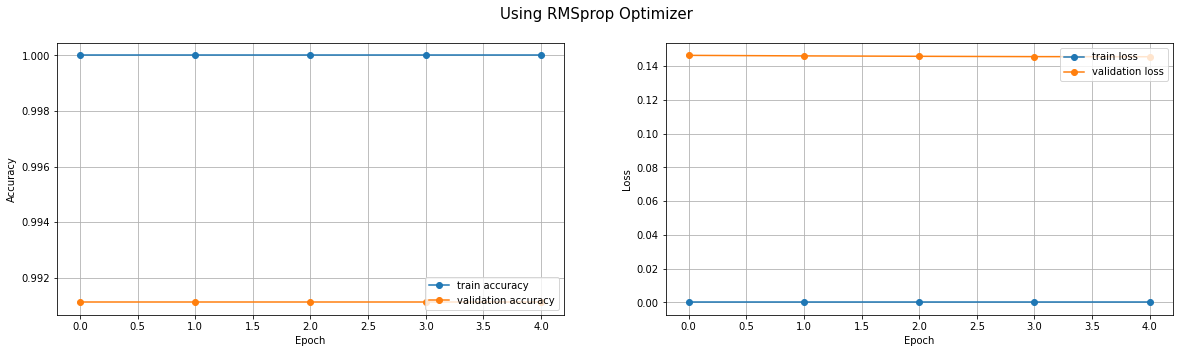

In [37]:
plt.figure(figsize=(20,5))
plt.suptitle('Using RMSprop Optimizer', fontsize = 15)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()